In [158]:
import cv2

In [159]:
frozen_model = '../input/object-detection-opencv/Object Dtection OpenCV/frozen_inference_graph.pb'
config_file = '../input/object-detection-opencv/Object Dtection OpenCV/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5, 127.5, 127.5)) 
model.setInputSwapRB(True)

<dnn_Model 0x7fe8c94f6d10>

In [160]:
classlabels = []
file_name = '../input/object-detection-opencv/Object Dtection OpenCV/coco.names'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

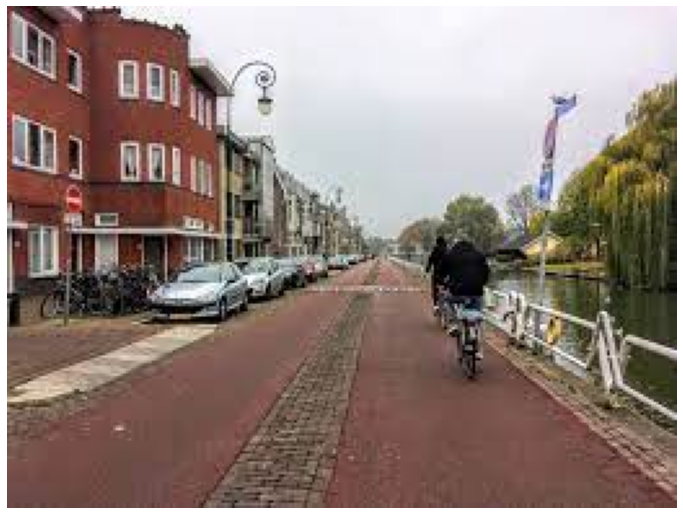

In [179]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)
img = cv2.imread('../input/figure/street.jpg')
#print('Original Dimensions : ',img.shape)
#width = 950 
#height = 950 
#dim = (width, height)
#resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#print('Resized Dimensions : ',resized.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
#plt.show()
plt.savefig("street_detection.png", dpi=400, bbox_inches='tight')

In [180]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [181]:
print(confidence)

[0.6124817  0.60350055 0.5878469  0.5832485  0.5724008  0.56282616
 0.54161    0.51602983 0.51242006]


In [182]:
print(bbox)

[[104  98  16  14]
 [171 118  14  25]
 [165  88  24  52]
 [115  97  11  10]
 [ 55 100  37  22]
 [ 57  97  52  24]
 [171 118  14  25]
 [ 88  97  21  17]
 [ 22 102  25  18]]


In [183]:
print(ClassIndex)

[3 2 1 3 3 3 4 3 2]


In [184]:
print(classlabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [185]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=1)

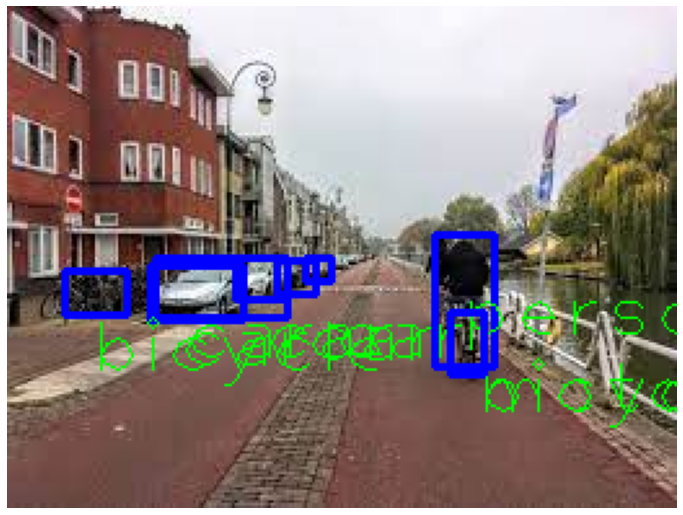

In [187]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
#plt.show()
plt.savefig("street_detection_2.png", dpi=400, bbox_inches='tight')